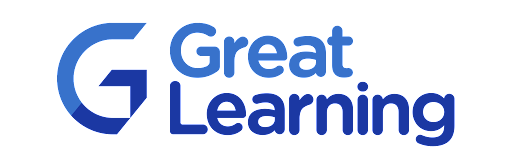

# Agenda

1. Case Study Details

2. Import Libraries

3. Load and Explore Data

5. Data Analysis and Preparation

6. Standardize the data

7. Model Building

8. Conclusion and Interpretation

## 1. Case Study Details

### Gesture Recognition using Muscle Activity



#### Domain
Domain
Human Computer Interaction, Neural Networks, Prosthetic Arms

#### Business Context
Prosthetic control systems enable prosthetic devices to have multiple degrees of freedom. The system is built of several components. 

It connects a muscle activity (EMG, Electromyography) sensor to a user Android/Android Things App. The app collects data, then a server builds a Tensorflow model specifically for this user. After that the model can be downloaded and executed on the device to control motors or other appendages.

This dataset can be used to map user residual muscle gestures to certain actions of a prosthetic such as an open/close hand or rotate wrist.

For a reference please watch a video on this topic : [Living with a mind-controlled robot arm](https://www.youtube.com/watch?v=xKUn0-Bhb7U)

Four classes of motion were written from MYO armband with the help of the nukleous app 

#### Objective
We will build a gesture classification model using the gesture classification dataset

#### Data Description
Each dataset line has 8 consecutive readings of all 8 sensors. so 64 columns of EMG data. The last column is a resulting gesture that was made while recording the data (classes 0-3)
 
So each line has the following structure:
[8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][8sensors][GESTURE_CLASS]

Data was recorded at 200 Hz, which means that each line is 8*(1/200) seconds = 40ms of record time.

A classifier given 64 numbers would predict a gesture class (0-3).

Gesture classes were : rock - 0, scissors - 1, paper - 2, ok - 3. Rock, paper, scissors gestures are like in the game with the same name, and the OK sign is an index finger touching the thumb and the rest of the fingers spread. 

Gestures were selected pretty much randomly.

Each gesture was recorded 6 times for 20 seconds. Each time recording started with the gesture being already prepared and held. Recording stopped while the gesture was still being held. 

In total there are 120 seconds of each gesture being held in fixed position. All of them recorded from the same right forearm in a short timespan. Every recording of a certain gesture class was concatenated into a .csv file with a corresponding name (0-3).


### Package version. 
- tensorflow==2.2.0
- matplotlib==3.2.1
- google==2.0.3

## 2. Import Libraries

In [7]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.8.2


In [8]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Load and Explore Data

In [9]:
gesture_df = pd.read_csv('gesture_recognition.csv')

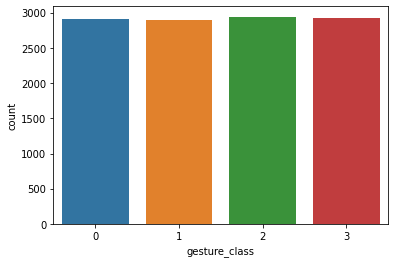

In [10]:
sns.countplot(gesture_df['gesture_class'])
plt.show()

Here we can see that all the classes in the target variables are mostly balanced with a slight variation. Hence there is no imbalance in the data

## 4.  Data Analysis and Preparation

In [11]:
gesture_df.head()

,Unnamed: 0,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,muscle reading 2 sensor 2,muscle reading 2 sensor 3,muscle reading 2 sensor 4,muscle reading 2 sensor 5,muscle reading 2 sensor 6,muscle reading 2 sensor 7,muscle reading 2 sensor 8,muscle reading 3 sensor 1,muscle reading 3 sensor 2,muscle reading 3 sensor 3,muscle reading 3 sensor 4,muscle reading 3 sensor 5,muscle reading 3 sensor 6,muscle reading 3 sensor 7,muscle reading 3 sensor 8,muscle reading 4 sensor 1,muscle reading 4 sensor 2,muscle reading 4 sensor 3,muscle reading 4 sensor 4,muscle reading 4 sensor 5,muscle reading 4 sensor 6,muscle reading 4 sensor 7,muscle reading 4 sensor 8,muscle reading 5 sensor 1,muscle reading 5 sensor 2,muscle reading 5 sensor 3,muscle reading 5 sensor 4,muscle reading 5 sensor 5,muscle reading 5 sensor 6,muscle reading 5 sensor 7,muscle reading 5 sensor 8,muscle reading 6 sensor 1,muscle reading 6 sensor 2,muscle reading 6 sensor 3,muscle reading 6 sensor 4,muscle reading 6 sensor 5,muscle reading 6 sensor 6,muscle reading 6 sensor 7,muscle reading 6 sensor 8,muscle reading 7 sensor 1,muscle reading 7 sensor 2,muscle reading 7 sensor 3,muscle reading 7 sensor 4,muscle reading 7 sensor 5,muscle reading 7 sensor 6,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8,gesture_class
0,0,-47.0000000,-6.0000000,-5.0000000,-7.0000000,13.0000000,-1.0000000,35.0000000,-10.0000000,10.0000000,-4.0000000,0.0000000,7.0000000,-31.0000000,-33.0000000,-48.0000000,-52.0000000,34.0000000,10.0000000,5.0000000,-9.0000000,23.0000000,63.0000000,76.0000000,49.0000000,-27.0000000,-7.0000000,-7.0000000,-3.0000000,0.0000000,4.0000000,-111.0000000,-2.0000000,-7.0000000,7.0000000,11.0000000,11.0000000,2.0000000,2.0000000,76.0000000,3.0000000,7.0000000,-2.0000000,0.0000000,-6.0000000,21.0000000,-3.0000000,0.0000000,-8.0000000,-40.0000000,-4.0000000,-1.0000000,6.0000000,-2.0000000,-2.0000000,-105.0000000,-25.0000000,47.0000000,6.0000000,6.0000000,5.0000000,13.0000000,21.0000000,111.0000000,15.0000000,0
1,1,-19.0000000,-8.0000000,-8.0000000,-8.0000000,-21.0000000,-6.0000000,-79.0000000,12.0000000,0.0000000,5.0000000,4.0000000,16.0000000,24.0000000,9.0000000,33.0000000,34.0000000,-1.0000000,-4.0000000,-3.0000000,-6.0000000,-7.0000000,-11.0000000,-85.0000000,-12.0000000,-10.0000000,-2.0000000,-3.0000000,-2.0000000,-8.0000000,-30.0000000,-16.0000000,-22.0000000,-21.0000000,-7.0000000,-8.0000000,-12.0000000,-14.0000000,-18.0000000,-76.0000000,-44.0000000,27.0000000,7.0000000,4.0000000,-4.0000000,-10.0000000,23.0000000,127.0000000,69.0000000,-25.0000000,-12.0000000,-9.0000000,1.0000000,18.0000000,-33.0000000,-128.0000000,-83.0000000,7.0000000,7.0000000,1.0000000,-8.0000000,7.0000000,21.0000000,114.0000000,48.0000000,0
2,2,2.0000000,3.0000000,0.0000000,2.0000000,0.0000000,22.0000000,106.0000000,-14.0000000,-16.0000000,-2.0000000,-3.0000000,-4.0000000,18.0000000,21.0000000,-9.0000000,2.0000000,-8.0000000,0.0000000,3.0000000,5.0000000,-14.0000000,-15.0000000,13.0000000,-13.0000000,11.0000000,-4.0000000,-5.0000000,-8.0000000,-30.0000000,-27.0000000,-128.0000000,-22.0000000,-3.0000000,-5.0000000,-8.0000000,0.0000000,25.0000000,-9.0000000,-28.0000000,2.0000000,-22.0000000,8.0000000,8.0000000,-2.0000000,2.0000000,12.0000000,53.0000000,20.0000000,28.0000000,-9.0000000,-5.0000000,-5.0000000,-7.0000000,-7.0000000,-54.0000000,-38.0000000,-11.0000000,4.0000000,7.0000000,11.0000000,33.0000000,39.0000000,119.0000000,43.0000000,0
3,3,6.0000000,0.0000000,0.0000000,-2.0000000,-14.0000000,10.0000000,-51.0000000,5.0000000,7.0000000,0.0000000,4.0000000,13.0000000,13.0000000,-16.0000000,-45.0000000,-

We will drop the Unnamed: 0 column as it has no use

In [12]:
gesture_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
gesture_df.shape

(11674, 65)

In [14]:
gesture_df.head()

,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,muscle reading 2 sensor 2,muscle reading 2 sensor 3,muscle reading 2 sensor 4,muscle reading 2 sensor 5,muscle reading 2 sensor 6,muscle reading 2 sensor 7,muscle reading 2 sensor 8,muscle reading 3 sensor 1,muscle reading 3 sensor 2,muscle reading 3 sensor 3,muscle reading 3 sensor 4,muscle reading 3 sensor 5,muscle reading 3 sensor 6,muscle reading 3 sensor 7,muscle reading 3 sensor 8,muscle reading 4 sensor 1,muscle reading 4 sensor 2,muscle reading 4 sensor 3,muscle reading 4 sensor 4,muscle reading 4 sensor 5,muscle reading 4 sensor 6,muscle reading 4 sensor 7,muscle reading 4 sensor 8,muscle reading 5 sensor 1,muscle reading 5 sensor 2,muscle reading 5 sensor 3,muscle reading 5 sensor 4,muscle reading 5 sensor 5,muscle reading 5 sensor 6,muscle reading 5 sensor 7,muscle reading 5 sensor 8,muscle reading 6 sensor 1,muscle reading 6 sensor 2,muscle reading 6 sensor 3,muscle reading 6 sensor 4,muscle reading 6 sensor 5,muscle reading 6 sensor 6,muscle reading 6 sensor 7,muscle reading 6 sensor 8,muscle reading 7 sensor 1,muscle reading 7 sensor 2,muscle reading 7 sensor 3,muscle reading 7 sensor 4,muscle reading 7 sensor 5,muscle reading 7 sensor 6,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8,gesture_class
0,-47.0000000,-6.0000000,-5.0000000,-7.0000000,13.0000000,-1.0000000,35.0000000,-10.0000000,10.0000000,-4.0000000,0.0000000,7.0000000,-31.0000000,-33.0000000,-48.0000000,-52.0000000,34.0000000,10.0000000,5.0000000,-9.0000000,23.0000000,63.0000000,76.0000000,49.0000000,-27.0000000,-7.0000000,-7.0000000,-3.0000000,0.0000000,4.0000000,-111.0000000,-2.0000000,-7.0000000,7.0000000,11.0000000,11.0000000,2.0000000,2.0000000,76.0000000,3.0000000,7.0000000,-2.0000000,0.0000000,-6.0000000,21.0000000,-3.0000000,0.0000000,-8.0000000,-40.0000000,-4.0000000,-1.0000000,6.0000000,-2.0000000,-2.0000000,-105.0000000,-25.0000000,47.0000000,6.0000000,6.0000000,5.0000000,13.0000000,21.0000000,111.0000000,15.0000000,0
1,-19.0000000,-8.0000000,-8.0000000,-8.0000000,-21.0000000,-6.0000000,-79.0000000,12.0000000,0.0000000,5.0000000,4.0000000,16.0000000,24.0000000,9.0000000,33.0000000,34.0000000,-1.0000000,-4.0000000,-3.0000000,-6.0000000,-7.0000000,-11.0000000,-85.0000000,-12.0000000,-10.0000000,-2.0000000,-3.0000000,-2.0000000,-8.0000000,-30.0000000,-16.0000000,-22.0000000,-21.0000000,-7.0000000,-8.0000000,-12.0000000,-14.0000000,-18.0000000,-76.0000000,-44.0000000,27.0000000,7.0000000,4.0000000,-4.0000000,-10.0000000,23.0000000,127.0000000,69.0000000,-25.0000000,-12.0000000,-9.0000000,1.0000000,18.0000000,-33.0000000,-128.0000000,-83.0000000,7.0000000,7.0000000,1.0000000,-8.0000000,7.0000000,21.0000000,114.0000000,48.0000000,0
2,2.0000000,3.0000000,0.0000000,2.0000000,0.0000000,22.0000000,106.0000000,-14.0000000,-16.0000000,-2.0000000,-3.0000000,-4.0000000,18.0000000,21.0000000,-9.0000000,2.0000000,-8.0000000,0.0000000,3.0000000,5.0000000,-14.0000000,-15.0000000,13.0000000,-13.0000000,11.0000000,-4.0000000,-5.0000000,-8.0000000,-30.0000000,-27.0000000,-128.0000000,-22.0000000,-3.0000000,-5.0000000,-8.0000000,0.0000000,25.0000000,-9.0000000,-28.0000000,2.0000000,-22.0000000,8.0000000,8.0000000,-2.0000000,2.0000000,12.0000000,53.0000000,20.0000000,28.0000000,-9.0000000,-5.0000000,-5.0000000,-7.0000000,-7.0000000,-54.0000000,-38.0000000,-11.0000000,4.0000000,7.0000000,11.0000000,33.0000000,39.0000000,119.0000000,43.0000000,0
3,6.0000000,0.0000000,0.0000000,-2.0000000,-14.0000000,10.0000000,-51.0000000,5.0000000,7.0000000,0.0000000,4.0000000,13.0000000,13.0000000,-16.0000000,-45.0000000,-7.0000000,-84.00000

As we can see there are a total of 65 features and 11674 observations in this dataset

In [15]:
gesture_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11674 entries, 0 to 11673
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   muscle reading 1 sensor 1  11674 non-null  float64
 1   muscle reading 1 sensor 2  11674 non-null  float64
 2   muscle reading 1 sensor 3  11674 non-null  float64
 3   muscle reading 1 sensor 4  11674 non-null  float64
 4   muscle reading 1 sensor 5  11674 non-null  float64
 5   muscle reading 1 sensor 6  11674 non-null  float64
 6   muscle reading 1 sensor 7  11674 non-null  float64
 7   muscle reading 1 sensor 8  11674 non-null  float64
 8   muscle reading 2 sensor 1  11674 non-null  float64
 9   muscle reading 2 sensor 2  11674 non-null  float64
 10  muscle reading 2 sensor 3  11674 non-null  float64
 11  muscle reading 2 sensor 4  11674 non-null  float64
 12  muscle reading 2 sensor 5  11674 non-null  float64
 13  muscle reading 2 sensor 6  11674 non-null  flo

In [16]:
gesture_df.isnull().any()

muscle reading 1 sensor 1    False
muscle reading 1 sensor 2    False
muscle reading 1 sensor 3    False
muscle reading 1 sensor 4    False
muscle reading 1 sensor 5    False
muscle reading 1 sensor 6    False
muscle reading 1 sensor 7    False
muscle reading 1 sensor 8    False
muscle reading 2 sensor 1    False
muscle reading 2 sensor 2    False
muscle reading 2 sensor 3    False
muscle reading 2 sensor 4    False
muscle reading 2 sensor 5    False
muscle reading 2 sensor 6    False
muscle reading 2 sensor 7    False
muscle reading 2 sensor 8    False
muscle reading 3 sensor 1    False
muscle reading 3 sensor 2    False
muscle reading 3 sensor 3    False
muscle reading 3 sensor 4    False
muscle reading 3 sensor 5    False
muscle reading 3 sensor 6    False
muscle reading 3 sensor 7    False
muscle reading 3 sensor 8    False
muscle reading 4 sensor 1    False
muscle reading 4 sensor 2    False
muscle reading 4 sensor 3    False
muscle reading 4 sensor 4    False
muscle reading 4 sen

In [17]:
features = gesture_df.iloc[:, :-1]
labels = gesture_df.iloc[:, -1]

In [18]:
features.head()

,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,muscle reading 2 sensor 2,muscle reading 2 sensor 3,muscle reading 2 sensor 4,muscle reading 2 sensor 5,muscle reading 2 sensor 6,muscle reading 2 sensor 7,muscle reading 2 sensor 8,muscle reading 3 sensor 1,muscle reading 3 sensor 2,muscle reading 3 sensor 3,muscle reading 3 sensor 4,muscle reading 3 sensor 5,muscle reading 3 sensor 6,muscle reading 3 sensor 7,muscle reading 3 sensor 8,muscle reading 4 sensor 1,muscle reading 4 sensor 2,muscle reading 4 sensor 3,muscle reading 4 sensor 4,muscle reading 4 sensor 5,muscle reading 4 sensor 6,muscle reading 4 sensor 7,muscle reading 4 sensor 8,muscle reading 5 sensor 1,muscle reading 5 sensor 2,muscle reading 5 sensor 3,muscle reading 5 sensor 4,muscle reading 5 sensor 5,muscle reading 5 sensor 6,muscle reading 5 sensor 7,muscle reading 5 sensor 8,muscle reading 6 sensor 1,muscle reading 6 sensor 2,muscle reading 6 sensor 3,muscle reading 6 sensor 4,muscle reading 6 sensor 5,muscle reading 6 sensor 6,muscle reading 6 sensor 7,muscle reading 6 sensor 8,muscle reading 7 sensor 1,muscle reading 7 sensor 2,muscle reading 7 sensor 3,muscle reading 7 sensor 4,muscle reading 7 sensor 5,muscle reading 7 sensor 6,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8
0,-47.0000000,-6.0000000,-5.0000000,-7.0000000,13.0000000,-1.0000000,35.0000000,-10.0000000,10.0000000,-4.0000000,0.0000000,7.0000000,-31.0000000,-33.0000000,-48.0000000,-52.0000000,34.0000000,10.0000000,5.0000000,-9.0000000,23.0000000,63.0000000,76.0000000,49.0000000,-27.0000000,-7.0000000,-7.0000000,-3.0000000,0.0000000,4.0000000,-111.0000000,-2.0000000,-7.0000000,7.0000000,11.0000000,11.0000000,2.0000000,2.0000000,76.0000000,3.0000000,7.0000000,-2.0000000,0.0000000,-6.0000000,21.0000000,-3.0000000,0.0000000,-8.0000000,-40.0000000,-4.0000000,-1.0000000,6.0000000,-2.0000000,-2.0000000,-105.0000000,-25.0000000,47.0000000,6.0000000,6.0000000,5.0000000,13.0000000,21.0000000,111.0000000,15.0000000
1,-19.0000000,-8.0000000,-8.0000000,-8.0000000,-21.0000000,-6.0000000,-79.0000000,12.0000000,0.0000000,5.0000000,4.0000000,16.0000000,24.0000000,9.0000000,33.0000000,34.0000000,-1.0000000,-4.0000000,-3.0000000,-6.0000000,-7.0000000,-11.0000000,-85.0000000,-12.0000000,-10.0000000,-2.0000000,-3.0000000,-2.0000000,-8.0000000,-30.0000000,-16.0000000,-22.0000000,-21.0000000,-7.0000000,-8.0000000,-12.0000000,-14.0000000,-18.0000000,-76.0000000,-44.0000000,27.0000000,7.0000000,4.0000000,-4.0000000,-10.0000000,23.0000000,127.0000000,69.0000000,-25.0000000,-12.0000000,-9.0000000,1.0000000,18.0000000,-33.0000000,-128.0000000,-83.0000000,7.0000000,7.0000000,1.0000000,-8.0000000,7.0000000,21.0000000,114.0000000,48.0000000
2,2.0000000,3.0000000,0.0000000,2.0000000,0.0000000,22.0000000,106.0000000,-14.0000000,-16.0000000,-2.0000000,-3.0000000,-4.0000000,18.0000000,21.0000000,-9.0000000,2.0000000,-8.0000000,0.0000000,3.0000000,5.0000000,-14.0000000,-15.0000000,13.0000000,-13.0000000,11.0000000,-4.0000000,-5.0000000,-8.0000000,-30.0000000,-27.0000000,-128.0000000,-22.0000000,-3.0000000,-5.0000000,-8.0000000,0.0000000,25.0000000,-9.0000000,-28.0000000,2.0000000,-22.0000000,8.0000000,8.0000000,-2.0000000,2.0000000,12.0000000,53.0000000,20.0000000,28.0000000,-9.0000000,-5.0000000,-5.0000000,-7.0000000,-7.0000000,-54.0000000,-38.0000000,-11.0000000,4.0000000,7.0000000,11.0000000,33.0000000,39.0000000,119.0000000,43.0000000
3,6.0000000,0.0000000,0.0000000,-2.0000000,-14.0000000,10.0000000,-51.0000000,5.0000000,7.0000000,0.0000000,4.0000000,13.0000000,13.0000000,-16.0000000,-45.0000000,-7.0000000,-84.0000000,-8.0000000,-3.000

In [19]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: gesture_class, dtype: int64

We have split the features and labels in our dataset. Now let us split them into training and testing data.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 99, stratify=labels)

In [21]:
y_train.value_counts()

2    2353
3    2337
0    2327
1    2322
Name: gesture_class, dtype: int64

In [22]:
y_test.value_counts()

2    589
3    584
0    582
1    580
Name: gesture_class, dtype: int64

## 5. Standardize the data

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [24]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
X_train_sc.shape

(9339, 64)

## 6. Model building

#### Let us now build the neural network model, fit the training data, test it and provide model summary. Feel free to play around with the network and get to a better solution.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([Input(shape=(64,)), 
                   Dense(64, activation='relu'), #hidden layer-1
                   Dense(4, activation='sigmoid')]) ## Output layer with 6 neurons



In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,420
Trainable params: 4,420
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [29]:
training_history =  model.fit(X_train_sc,y_train,validation_data=(X_test_sc,y_test),epochs=50,batch_size=32)

Epoch 1/50
292/292 [==============================] - 2s 3ms/step - loss: 1.2187 - accuracy: 0.4745 - val_loss: 0.9434 - val_accuracy: 0.6951
Epoch 2/50
292/292 [==============================] - 1s 2ms/step - loss: 0.7531 - accuracy: 0.7924 - val_loss: 0.6401 - val_accuracy: 0.8227
Epoch 3/50
292/292 [==============================] - 1s 2ms/step - loss: 0.5147 - accuracy: 0.8648 - val_loss: 0.4820 - val_accuracy: 0.8668
Epoch 4/50
292/292 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.9010 - val_loss: 0.3920 - val_accuracy: 0.8882
Epoch 5/50
292/292 [==============================] - 1s 2ms/step - loss: 0.3007 - accuracy: 0.9217 - val_loss: 0.3350 - val_accuracy: 0.9058
Epoch 6/50
292/292 [==============================] - 1s 2ms/step - loss: 0.2465 - accuracy: 0.9361 - val_loss: 0.2999 - val_accuracy: 0.9143
Epoch 7/50
292/292 [==============================] - 1s 2ms/step - loss: 0.2096 - accuracy: 0.9445 - val_loss: 0.2720 - val_accuracy: 0.9225
Epoch 

# 7. Conclusion and Interpretation 

In [30]:
# Final evaluation of the model
scores = model.evaluate(X_test_sc, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.35297641158103943
Accuracy: 0.9344753623008728


Text(0.5, 1.0, 'Training and validation loss')

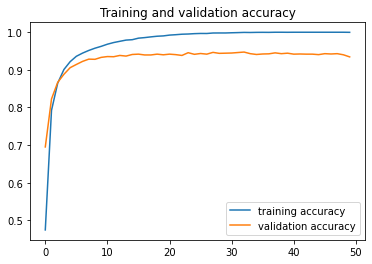

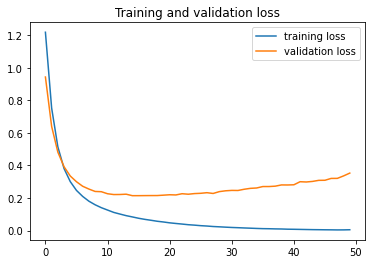

In [31]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy')
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')

We are able to build a neural network classifier that is able to distinguish between different gestures with a test accuracy of 91%. We can observe from the above plots that model begins to overfit after a certain point.

We should be able to over come the small amount of overfitting which we are seeing in the model by performing hyperparameter tuning.